In [2]:
import yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = yfinance.download('EURUSD=X',start='2004-01-01',end='2020-01-01')

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 166, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/opt/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 178, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/opt/anaconda3/lib/python3.8/site-packages/yfinance/base.py", line 156, in history
    data = data.json()
  File "/opt/anaconda3/lib/python3.8/site-packages/requests/models.py", line 898, in json
    return complexjson.loads(self.t

In [ ]:
df

In [4]:
# create a dataframe for trading signals
signals = pd.DataFrame()
signals['currency price'] = df['Close']
window = 12
no_of_std = 1.5

# calculate rolling mean and standard deviation
rolling_mean = df['Close'].rolling(window).mean()
rolling_std = df['Close'].rolling(window).std()

# create two new DataFrame columns to hold values of upper and lower Bollinger bands
signals['Rolling Mean'] = rolling_mean
signals['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
signals['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
# create signal 
#sell the ratio if z-score is greater than 1 , buy the ratio if z-score is less than 1
signals['signals'] = 0
signals['signals'] = np.select([signals['currency price'] > signals['Bollinger High'], signals['currency price'] < signals['Bollinger Low']], [-1, 1], default=0)
# if the buy or sell signals keep appearing, we only count the first signal
# which means 1 sell signal following 1 buy signal  
signals['positions'] = signals['signals'].diff()
# verify datafame
signals

,currency price,Rolling Mean,Bollinger High,Bollinger Low,signals,positions
Date,,,,,,
2004-01-01,1.258194,NaN,NaN,NaN,0,NaN
2004-01-02,1.258194,NaN,NaN,NaN,0,0.0
2004-01-05,1.268698,NaN,NaN,NaN,0,0.0
2004-01-06,1.272103,NaN,NaN,NaN,0,0.0
2004-01-07,1.264095,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...
2019-12-26,1.109545,1.111906,1.116536,1.107275,0,0.0
2019-12-27,1.110112,1.111975,1.116522,1.107429,0,0.0
2019-12-30,1.118230,1.112362,1.117632,1.107092,-1,-1.0


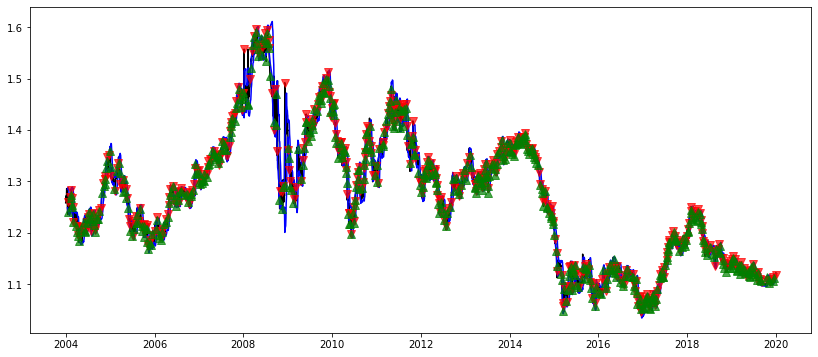

In [5]:
fig=plt.figure(figsize=(14,6))
bx = fig.add_subplot(111)   
#plot two different assets
bx.plot(signals['currency price'], c='black')
bx.plot(signals['Bollinger High'], c='blue')
bx.plot(signals['Bollinger Low'], c='blue')
bx.plot(signals['currency price'][signals['positions'] == -1], lw=0, marker='v', markersize=8, c='r',alpha=0.7)
bx.plot(signals['currency price'][signals['positions'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=0.7)

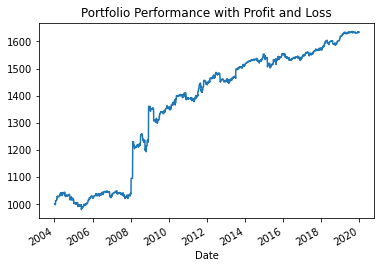

,asset,holdings,cash,total asset,return,positions
Date,,,,,,
2004-01-05,1.268698,0.000000,1000.000000,1000.000000,0.000000,0.0
2004-01-06,1.272103,0.000000,1000.000000,1000.000000,0.000000,0.0
2004-01-07,1.264095,0.000000,1000.000000,1000.000000,0.000000,0.0
2004-01-08,1.277498,0.000000,1000.000000,1000.000000,0.000000,0.0
2004-01-09,1.285892,0.000000,1000.000000,1000.000000,0.000000,0.0
2004-01-12,1.274096,0.000000,1000.000000,1000.000000,0.000000,0.0
2004-01-13,1.278593,0.000000,1000.000000,1000.000000,0.000000,0.0
2004-01-14,1.265102,0.000000,1000.000000,1000.000000,0.000000,0.0
2004-01-15,1.260097,0.000000,1000.000000,1000.000000,0.000000,0.0


In [11]:
# total initial money set at 1000 usd
money = 1000

# shares to buy for position, floor divison
positions = (money)// max(signals['currency price'])

# pnl
portfolio = pd.DataFrame()
portfolio['asset'] = signals['currency price']
portfolio['holdings'] = signals['positions'].cumsum() * signals['currency price'] * positions
portfolio['cash'] = money - (signals['positions'] * signals['currency price'] * positions).cumsum()
portfolio['total asset'] = portfolio['holdings'] + portfolio['cash']
portfolio['return'] = portfolio['total asset'].pct_change()
portfolio['positions'] = signals['positions']

portfolio = portfolio.dropna()

# plot the asset value change of the portfolio and pnl along with z-score

portfolio['total asset'].plot()
plt.title('Portfolio Performance with Profit and Loss')
plt.show()
portfolio.head(50)

In [9]:
returns =  (portfolio['total asset']- portfolio['total asset'].shift(1))/ portfolio['total asset'].shift(1)
sharp_ratio = returns.mean()/returns.std()*np.sqrt(365)
print('sharpe ratio  =',sharp_ratio)

sharpe ratio  = 0.8332952255651104


In [12]:
#calculate the daily return
df_daily_returns = portfolio['total asset'].pct_change()
#Calculate the cumulative daily returns 
df_cum_returns = (df_daily_returns + 1).cumprod()
highwatermarks = df_cum_returns.cummax()
print(highwatermarks.dropna())

Date
2004-01-06    1.000000
2004-01-07    1.000000
2004-01-08    1.000000
2004-01-09    1.000000
2004-01-12    1.000000
                ...   
2019-12-26    1.636729
2019-12-27    1.636729
2019-12-30    1.636729
2019-12-31    1.636729
2020-01-01    1.636729
Name: total asset, Length: 4123, dtype: float64


In [13]:
#drawdown rate
drawdown_rate =(df_cum_returns-highwatermarks)/highwatermarks
max_drawdown_rate = min(drawdown_rate.dropna())
print("ALL drawdowns rate:")
print(drawdown_rate)
print("Maximum drawdowns rate:")
print(max_drawdown_rate)

ALL drawdowns rate:
Date
2004-01-05         NaN
2004-01-06    0.000000
2004-01-07    0.000000
2004-01-08    0.000000
2004-01-09    0.000000
                ...   
2019-12-26   -0.000437
2019-12-27   -0.000437
2019-12-30   -0.000437
2019-12-31   -0.001200
2020-01-01   -0.001907
Name: total asset, Length: 4124, dtype: float64
Maximum drawdowns rate:
-0.061791137165963544


In [14]:
#drawdown depth
drawdown_depth = df_cum_returns-highwatermarks
search = 0.000000 
recoverpoint = drawdown_depth.loc[drawdown_depth.isin([search])].index.tolist()
duration = [recoverpoint[i+1]-recoverpoint[i] for i in range(len(recoverpoint)-1)]
print("Duration for each drawdowns:")
duration

Duration for each drawdowns:


[Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('4 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedel